In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def KL_1DNys(N,M,a,b,Cov,quad = "EOLE"):
    """
    Karhunen-Loeve in 1-Dimension using Nystrom method.
    -----
    input
    -----
    N: Order of the Karhunen-Loeve expansion.
    M: number of quadrature intervals . N <=M
    a,b: domain of simulation, X_t for t in [a,b]
    Cov: The covariance function, a bivariate function
    quad: Quadrature used."EOLE" for the EOLE method. I tried Gauss-Legendre
    before and there was an issue with inaccurate simulation at the end
    points of the simulation domain
    -----
    output
    -----
    X: a 1-D array of the random field
    phi: a 2-D arrray whose columns are the eigenfunctions
    L: an 1-D array of the eigenvalues.
    """
    if N > M:
        raise ValueError('Order of expansion N should be less than quadrature\
points used')
    if quad == "EOLE": # EOLE method
        x = np.linspace(a,b,M+1) # EOLE uniform grid.
        W = (1./M)*(b-a)*np.eye(M+1) #EOLE weight matrix
        x1,x2 = np.meshgrid(x,x)
        C = Cov(x1,x2) # covariance matrix
        B = np.dot(np.dot(np.sqrt(W),C),np.sqrt(W)) #symmetric B matrix.
        L,y = np.linalg.eig(B) # eigenvalues and -vectors of B
        X = np.zeros(M+1)
        W_inv = np.sqrt((float(M)/(b-a)))*np.eye(M+1) # weights matrix.
        phi = np.dot(W_inv,y) # original eigenvector problem.
        Z = np.random.randn(M+1)
        for i in range(N):
            X += Z[i]*np.sqrt(L[i])*phi[:,i]
        return X, phi, L
    else:
        raise ValueError('We only have EOLE quadrature for now.')



[0.40731577 0.04525916 0.01629463 0.00831461 0.00503065 0.00336831
 0.00241222 0.00181237 0.00141148 0.00113038]
[0.4052847345693511, 0.04503163717437234, 0.016211389382774045, 0.008271117032027573, 0.005003515241596927, 0.003349460616275629, 0.002398134524079001, 0.0018012654869748938, 0.001402369323769381, 0.0011226723949289506]
14.142135623730951


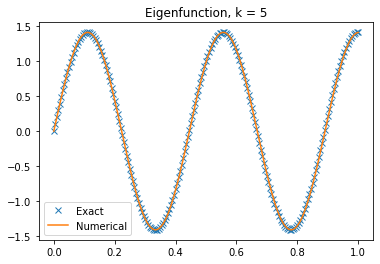

In [3]:
N = 100 # order of the KL expansion
M = 200 # M+1 quadrature points
def Bm(t,s):
    return np.minimum(t,s)
a, b = 0., 1. # domain of simulation
X,phi,L = KL_1DNys(N,M,a,b,Bm)
print(L[:10])
print([ 1./((k+0.5)**2*np.pi**2) for k in range(10)])
# plot eigenvalues: pi/L = (k-0.5)**2 for BM
L_ex = [(k+0.5)**2 for k in range(10)]
L_app = 1./(L[:10]*np.pi**2)
plt.plot(L_ex, label = "exact eigenvalues")
plt.plot(L_app,'x', label = "numerical eigenvalues")
plt.legend()
plt.ylabel(r' $\frac{1}{\lambda_k\pi^2}$')
plt.title(' Eigenvalues')
plt.savefig("BM_EV_eg.pdf")
plt.close()
t= np.linspace(a,b,M+1) # t-grid
print(np.linalg.norm(phi[:,4],2))
e= phi[:,4]
plt.plot(t, np.sqrt(2)*np.sin(4.5*np.pi*t),'x',label= "Exact")
plt.plot(t, e, label = "Numerical")
plt.title("Eigenfunction, k = {}".format(5))
plt.legend()
plt.savefig("BM_EF_eg.pdf")

In [4]:
def KL_2DNys(N,n,m,lims,Cov,quad = "EOLE"):
    """
    Solver using the Nystrom method for finding the Karhunen-Loeve expansion	-----
    input
    -----
    N: The order of the Karhunen-Loeve expansion.
    n,m: n and m are the number of grid points along x and y direction respectively. 
    lims: lims=[a,b,c,d] simulation domain is [a,b] x [c,d]
    Cov: the covariance function should. Should be given as c(x,y), x and y bivariate vectors.
    quad: The quadrature method used. EOLE will be the only implemented for now 
    """
    a,b,c,d = lims # extract domain limits
    A = (b-a)*(d-c) # Omega area of the rectangular domain.
    x, y = np.linspace(a,b,n), np.linspace(a,b,m) 
    W =(A/((n-1)*(m-1)))*np.eye(n*m)
    xx = np.hstack([np.repeat(x,m).reshape(n*m,1),np.tile(y,n).reshape(n*m,1)])
    xxx = np.hstack([np.repeat(xx,n*m,axis=0),np.tile(xx,[n*m,1])])
    C = Cov(xxx[:,0:2],xxx[:,2:]).reshape(n*m,n*m) #Covariance matrix, check this.
    B = np.dot(np.dot(np.sqrt(W),C),np.sqrt(W)) # symmetric pos def B
    L,y = np.linalg.eig(B) # eigeevalues and vectors of B.
    W_inv = np.sqrt(float((n-1)*(m-1))/A)*np.eye(n*m) # invert W matrix.
    phi = np.dot(W_inv,y)
    Z = np.random.randn(N) # array of standard normal RVs.
    X = np.zeros(n*m)
    for i in range(N):
        X += np.sqrt(L[i].real)*Z[i]*phi[:,i].real
    return X.reshape(n,m), np.array(phi),L # just return eigensuite for now

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.00398589  0.00784752 ... -0.06920368 -0.06379327
  -0.05938961]
 [ 0.          0.01015828  0.02006701 ... -0.07448741 -0.06340447
  -0.05446807]
 ...
 [ 0.          0.04870367  0.09163284 ... -0.75432981 -0.56292484
  -0.42350065]
 [ 0.          0.04647854  0.08714753 ... -0.79999137 -0.60770398
  -0.46769149]
 [ 0.          0.04462828  0.08343057 ... -0.84114978 -0.64847674
  -0.50819781]]


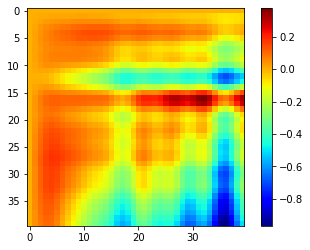

In [11]:
def Cov(x,y):
    s = x - y
    A = np.array([[1,0.8],[0.8,1]])
    arg = A[0,0]*s[:,0]**2 +(A[1,0]+ A[0,1])*s[:,0]*s[:,1] + A[1,1]*s[:,1]**2
    return np.exp(-arg)
def BM(x,y):
    S = np.minimum(x[:,0],y[:,0])*np.minimum(x[:,1],y[:,1])
    return S
N= 40
n,m = 40,40
lims = [0., 1., 0., 1.] # limits
#x,y = np.linspace(lims[0],lims[1],M[0]+1),np.linspace(lims[2],lims[3],M[1]+1)
#xx,yy = np.meshgrid(x,y)
X, Phi, L= KL_2DNys(N,n,m,lims,BM)
print(X)
plt.Figure(figsize=(12,8))
plt.imshow(X, cmap = "jet")
plt.colorbar()
plt.show()

In [6]:
Z= np.array([[0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.]])
w= 2*Z
BM(Z,w)

array([0., 0., 0., 1.])

In [7]:
t = np.random.randn(5)
t

array([ 0.2196911 , -0.75325988,  1.60678343,  0.75663818, -0.13552079])

In [8]:
for i 
np.min(t,)

SyntaxError: invalid syntax (<ipython-input-8-894105dfa425>, line 1)